<a href="https://colab.research.google.com/github/hamoudaattia/auto_brake_system_FL/blob/main/information%20extraction%20and%20grouping%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
!pip install tesseract
!apt-get install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [109]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
a = ("/content/drive/MyDrive/largepreview.png")

In [113]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(a)

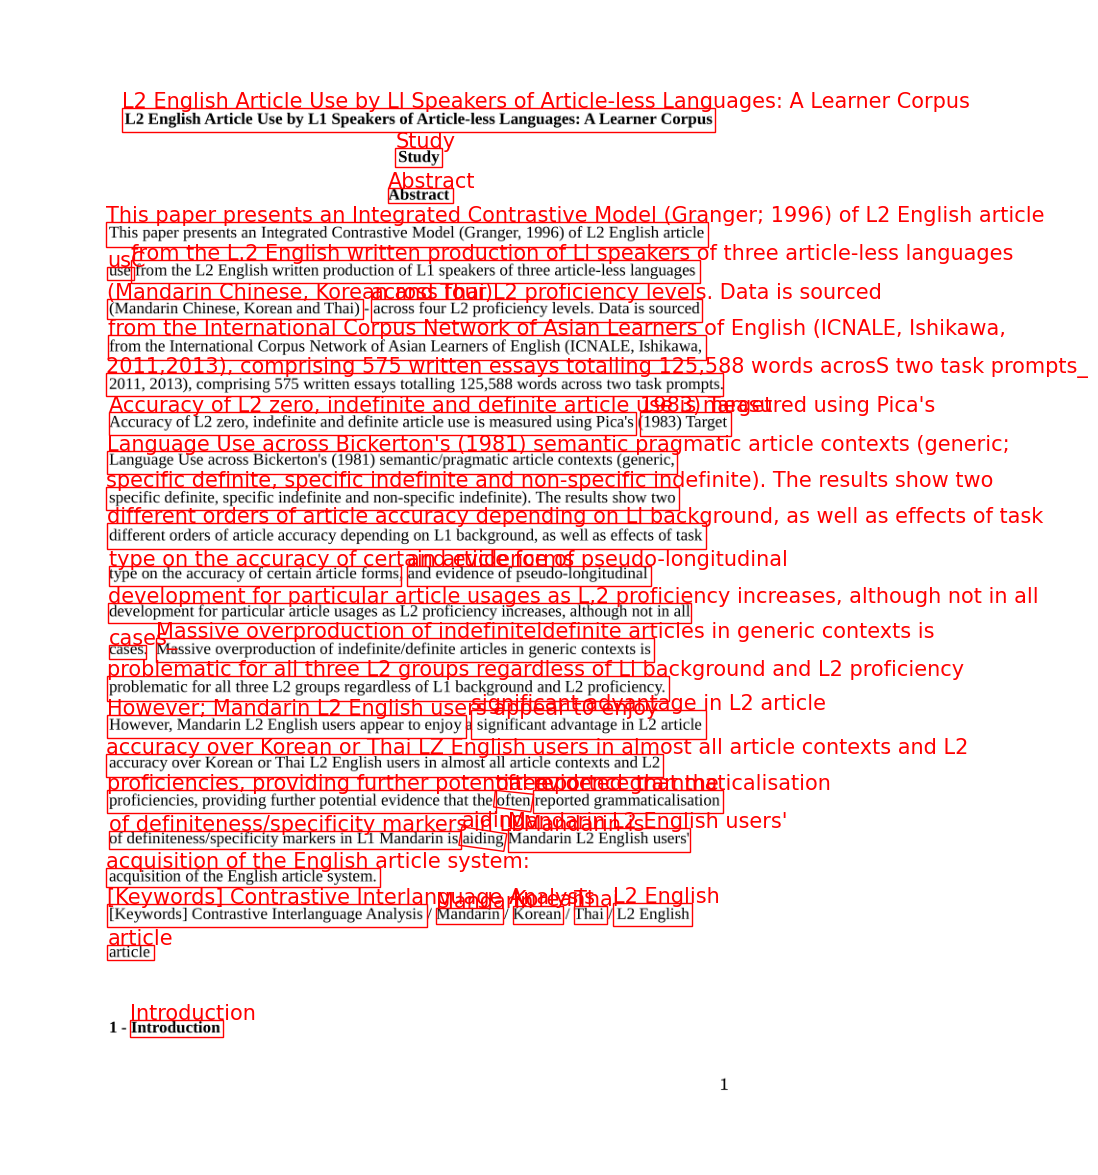

In [114]:
import matplotlib.pyplot as plt 

im = plt.imread(a)

fig = plt.figure(figsize=(15,15))

plt.imshow(im)

for _ in result:
    x = [n[0] for n in _[0]]
    y = [n[1] for n in _[0]]
    plt.fill(x,y, facecolor='none', edgecolor='red')
    plt.text(x[0],y[0], _[1], color='red', fontsize=15)

plt.axis('off')
plt.savefig('output_easyocr.png')
plt.show()

In [115]:
import pytesseract
from PIL import Image

In [116]:
# Path to the image file
image_path = a

# Open the image file using PIL (Python Imaging Library)
image = Image.open(image_path)

# Perform OCR using Pytesseract
text = pytesseract.image_to_string(image)

# Print the extracted text
print(text)

# Save the extracted text in a text file
text_file = open('/content/drive/MyDrive/extracted_text.txt', 'w')
text_file.write(text)
text_file.close()

print('Text extracted and saved successfully!')

L2 English Article Use by L1 Speakers of Article-less Languages: A Learner Corpus
Study

Abstract
This paper presents an Integrated Contrastive Model (Granger, 1996) of L2 English article
use from the L2 English written production of L1 speakers of three article-less languages
(Mandarin Chinese, Korean and Thai) - across four L2 proficiency levels. Data is sourced
from the International Corpus Network of Asian Learners of English (ICNALE, Ishikawa,
2011, 2013), comprising 575 written essays totalling 125,588 words across two task prompts.
Accuracy of L2 zero, indefinite and definite article use is measured using Pica's (1983) Target
Language Use across Bickerton's (1981) semantic/pragmatic article contexts (generic,
specific definite, specific indefinite and non-specific indefinite). The results show two
different orders of article accuracy depending on L1 background, as well as effects of task
type on the accuracy of certain article forms, and evidence of pseudo-longitudinal
developme

In [117]:
b = '/content/drive/MyDrive/extracted_text.txt'

In [118]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-12 14:02:54.434298: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 14:02:57.027041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [120]:
!pip install sklearn --index-


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

--index-url option requires 1 argument


In [121]:
!pip install nltk 
nltk.download('averaged_perceptron_tagger')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [122]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [123]:
import csv
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

# Load the text from a file
filename = b
with open(filename, "r") as file:
    text = file.read()

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Extract named entities from each sentence
entities = []
for sentence in sentences:
    # Perform part-of-speech tagging
    tagged_sentence = pos_tag(nltk.word_tokenize(sentence))
    # Perform named entity recognition
    chunked_sentence = ne_chunk(tagged_sentence)
    # Extract named entities
    for entity in chunked_sentence:
        if hasattr(entity, 'label'):
            entities.append((' '.join([child[0] for child in entity]), entity.label()))

# Group the named entities by label
grouped_entities = {}
for entity, label in entities:
    if label in grouped_entities:
        grouped_entities[label].append(entity)
    else:
        grouped_entities[label] = [entity]

# Define the CSV file path
csv_file = "/content/drive/MyDrive/grouped_entities2.csv"

# Write the grouped entities to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Label', 'Entities'])  # Write header row

    # Write each label and entities as a row
    for label, entities in grouped_entities.items():
        writer.writerow([label, ', '.join(entities)])

print("Grouped entities saved to CSV file:", csv_file)


Grouped entities saved to CSV file: /content/drive/MyDrive/grouped_entities2.csv
